In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data.csv",encoding='latin1')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
data["Count"] = 1
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"] , format="%m/%d/%Y %H:%M")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1


In [57]:
grouped1 = data.groupby([pd.Grouper(key="InvoiceDate", freq="min")]).sum().reset_index()

In [70]:
grouped1 = grouped1[grouped1["Count"] != 0].reset_index()

In [71]:
grouped1

,index,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Count
0,0,2010-12-01 08:26:00,536365536365536365536365536365536365536365,85123A7105384406B84029G84029E2275221730,WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...,40,27.37,124950.0,United KingdomUnited KingdomUnited KingdomUnit...,7
1,2,2010-12-01 08:28:00,536366536366,2263322632,HAND WARMER UNION JACKHAND WARMER RED POLKA DOT,12,3.70,35700.0,United KingdomUnited Kingdom,2
2,8,2010-12-01 08:34:00,5363675363675363675363675363675363675363675363...,8487922745227482274922310849692262322622217542...,ASSORTED COLOUR BIRD ORNAMENTPOPPY'S PLAYHOUSE...,98,77.34,208752.0,United KingdomUnited KingdomUnited KingdomUnit...,16
3,9,2010-12-01 08:35:00,536369,21756,BATH BUILDING BLOCK WORD,3,5.95,13047.0,United Kingdom,1
4,19,2010-12-01 08:45:00,5363705363705363705363705363705363705363705363...,2272822727227262172421883100022179121035223262...,ALARM CLOCK BAKELIKE PINKALARM CLOCK BAKELIKE ...,449,55.29,251660.0,FranceFranceFranceFranceFranceFranceFranceFran...,20
...,...,...,...,...,...,...,...,...,...,...
23255,537357,2011-12-09 12:23:00,581583581583,2072585038,LUNCH BAG RED RETROSPOT6 CHOCOLATE LOVE HEART ...,76,3.30,27554.0,United KingdomUnited Kingdom,2
23256,537359,2011-12-09 12:25:00,581584581584,2083285038,RED FLOCK LOVE HEART PHOTO FRAME6 CHOCOLATE LO...,120,2.57,27554.0,United KingdomUnited Kingdom,2
23257,537365,2011-12-09 12:31:00,5815855815855815855815855815855815855815855815...,2248122915221782246084832230848487984945221132...,BLACK TEA TOWEL CLASSIC DESIGNASSORTED BOTTLE ...,278,37.78,331884.0,United KingdomUnited KingdomUnited KingdomUnit...,21
23258,537383,2011-12-09 12:49:00,581586581586581586581586,22061232752121720685,LARGE CAKE STAND HANGING STRAWBERYSET OF 3 HA...,66,20.23,52452.0,United KingdomUnited KingdomUnited KingdomUnit...,4


In [79]:
replaced = grouped1[["Count"]]
replaced

,Count
0,7
1,2
2,16
3,1
4,20
...,...
23255,2
23256,2
23257,21
23258,4


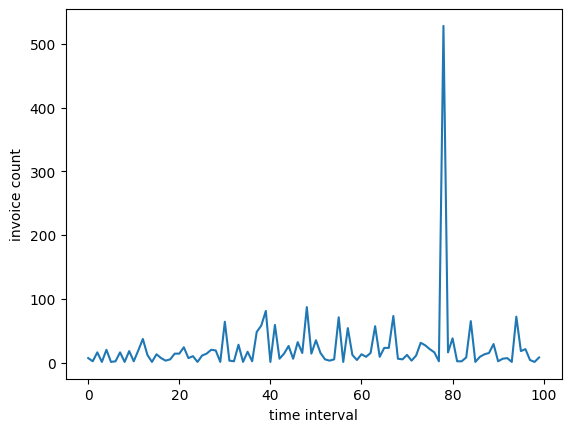

In [88]:
display_grouped1 = replaced[0:100]
plt.xlabel(xlabel="time interval")
plt.ylabel(ylabel="invoice count")
plt.plot(display_grouped1.index, display_grouped1["Count"])
plt.savefig("sample_ec_traffice.png")